<h2>EDA

separate dataset, 20% to validation

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
all_data = pd.read_csv("C:/Users/DELL/Downloads/archive (1)/online_shoppers_intention.csv")

train, validation = train_test_split(all_data, test_size=0.2, random_state=42)

sizes of sets:

In [5]:
train.shape, validation.shape

((9864, 18), (2466, 18))

In [3]:
train.to_csv("C:/Users/DELL/Downloads/data.csv",index=False)
validation.to_csv("C:/Users/DELL/Downloads/val.csv",index=False)

In [23]:
data=pd.read_csv('data/data.csv')
# train, test = train_test_split(
#    data, test_size=0.3, random_state=42
# )

<h3>attributes

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False,False
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False,False
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True,False


data consists of 18 columns, 9 num 5 cat 2 bools and 2 objects

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

encoding Month, VisitorType, Weekend, Revenue

In [24]:
data_encoded=data.copy()
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data_encoded['Month'] = data_encoded['Month'].map(month_to_num)
data_encoded.dropna(subset=['Month'], inplace=True)
data_encoded['Month'] = data_encoded['Month'].astype(int)

In [6]:
data_encoded['Month'].unique()

array([ 3, 11,  9, 10,  5, 12,  6,  8,  7,  2])

In [7]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [25]:
visitor_to_num = {
    'Returning_Visitor': 2,
    'New_Visitor': 1,
    'Other': 0
}
data_encoded['VisitorType'] = data_encoded['VisitorType'].map(visitor_to_num)
data_encoded.dropna(subset=['VisitorType'], inplace=True)
data_encoded['VisitorType'] = data_encoded['VisitorType'].astype(int)

In [26]:
from sklearn.calibration import LabelEncoder

data_encoded['Weekend']=LabelEncoder().fit_transform(data_encoded['Weekend'])

In [27]:
data_encoded['Revenue']=LabelEncoder().fit_transform(data_encoded['Revenue'])

In [11]:
data_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,3,2,6,1,1,2,0,0
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,11,2,2,3,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,3,2,2,1,1,2,0,0
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,9,2,2,8,2,1,0,0
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,11,3,2,7,8,1,1,0


In [10]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   int32  
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

In [11]:
data_encoded.describe()    	

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2.302818,81.107226,0.503447,34.062159,31.736922,1197.331019,0.021659,0.042613,5.832987,0.061071,7.673763,2.121046,2.359692,3.154501,4.073905,1.847932,0.227899,0.151764
std,3.297117,177.511054,1.266877,138.941112,44.562956,1922.835536,0.047469,0.047839,18.483546,0.198057,3.389126,0.910107,1.723978,2.412381,4.033786,0.379690,0.419499,0.358810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.000000,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.541667,0.002961,0.025000,0.000000,0.000000,8.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,92.000000,0.000000,0.000000,37.000000,1471.189584,0.016667,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


<h3> 
Data has different orders of magnitude, which can make it difficult for many clustering algorithms to operate.

correlations

In [12]:
data_encoded.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.591798,0.375070,0.253718,0.432604,0.372136,-0.221412,-0.313816,0.095305,-0.093222,0.096572,-0.006473,-0.025264,-0.004876,-0.030842,-0.017799,0.026335,0.126812
Administrative_Duration,0.591798,1.000000,0.298518,0.227784,0.290101,0.356483,-0.141862,-0.204023,0.072598,-0.067439,0.055969,-0.006037,-0.012773,-0.005233,-0.008637,-0.019777,0.017141,0.088759
Informational,0.375070,0.298518,1.000000,0.615074,0.364077,0.374700,-0.112586,-0.160941,0.050440,-0.049167,0.060359,-0.019268,-0.043740,-0.031292,-0.033550,0.057368,0.040493,0.096208
Informational_Duration,0.253718,0.227784,0.615074,1.000000,0.267788,0.329028,-0.071531,-0.103730,0.035244,-0.034137,0.043700,-0.017639,-0.021914,-0.024639,-0.022997,0.045265,0.026440,0.065073
ProductRelated,0.432604,0.290101,0.364077,0.267788,1.000000,0.856915,-0.200540,-0.289214,0.054811,-0.026547,0.154189,0.002855,-0.011369,-0.038992,-0.044124,0.128302,0.013285,0.145314
ProductRelated_Duration,0.372136,0.356483,0.374700,0.329028,0.856915,1.000000,-0.180450,-0.247230,0.048800,-0.036303,0.132436,0.002530,-0.007660,-0.036194,-0.036471,0.120850,0.006076,0.139833
BounceRates,-0.221412,-0.141862,-0.112586,-0.071531,-0.200540,-0.180450,1.000000,0.911491,-0.118018,0.078258,-0.062854,0.028114,-0.009896,-0.002230,0.082409,0.112102,-0.047814,-0.147753
ExitRates,-0.313816,-0.204023,-0.160941,-0.103730,-0.289214,-0.247230,0.911491,1.000000,-0.174177,0.108127,-0.089590,0.021306,0.000275,-0.004312,0.080058,0.148888,-0.063180,-0.205205
PageValues,0.095305,0.072598,0.050440,0.035244,0.054811,0.048800,-0.118018,-0.174177,1.000000,-0.067656,0.074469,0.017037,0.045637,0.019989,0.014945,-0.122739,0.006008,0.495700
SpecialDay,-0.093222,-0.067439,-0.049167,-0.034137,-0.026547,-0.036303,0.078258,0.108127,-0.067656,1.000000,-0.258423,0.011296,0.006509,-0.012238,0.049326,0.087375,-0.024512,-0.090200


lots of features are correlated

<Axes: >

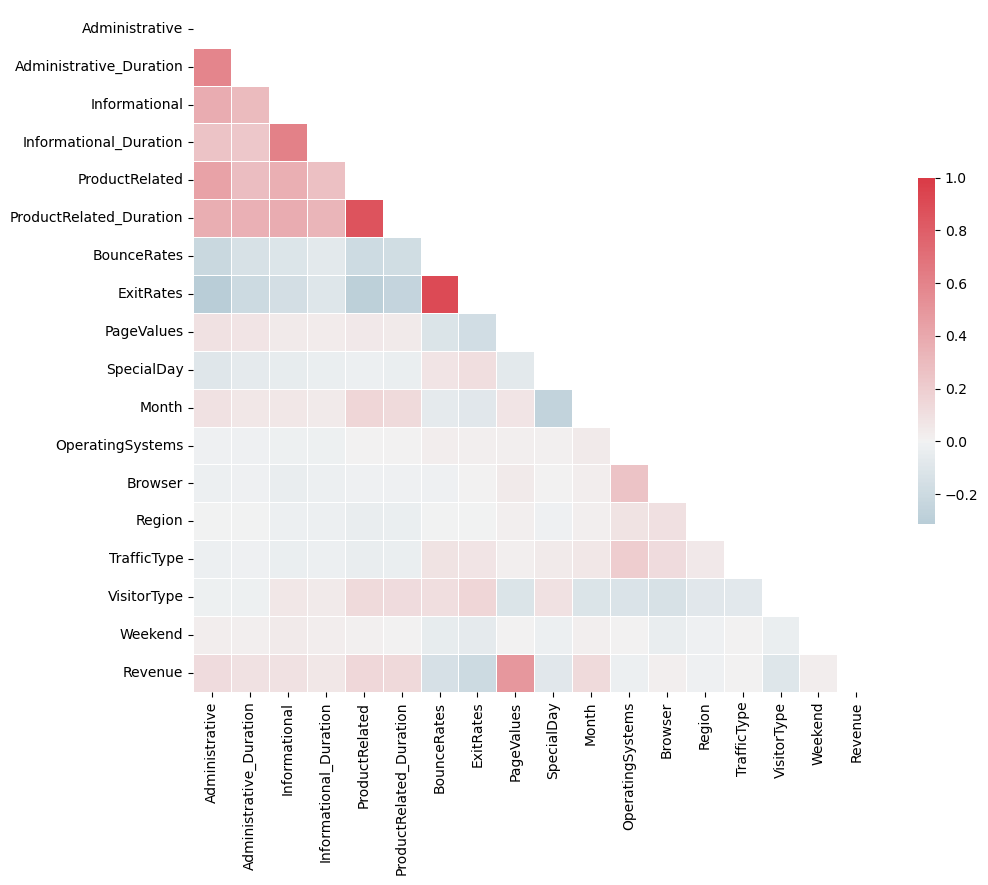

In [14]:
import seaborn as sns
mask = np.triu(np.ones_like(data_encoded.corr()
                            , dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(data_encoded.corr()
            , mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
data.corr()[(1.0>data.corr()) & (abs(data.corr())>0.3)].stack()

Administrative           Administrative_Duration    0.591798
                         Informational              0.375070
                         ProductRelated             0.432604
                         ProductRelated_Duration    0.372136
                         ExitRates                 -0.313816
Administrative_Duration  Administrative             0.591798
                         ProductRelated_Duration    0.356483
Informational            Administrative             0.375070
                         Informational_Duration     0.615074
                         ProductRelated             0.364077
                         ProductRelated_Duration    0.374700
Informational_Duration   Informational              0.615074
                         ProductRelated_Duration    0.329028
ProductRelated           Administrative             0.432604
                         Informational              0.364077
                         ProductRelated_Duration    0.856915
ProductRelated_Duration 

correlation > 0.85

In [15]:
data.corr()[(1.0>data.corr()) & (abs(data.corr())>0.85)].stack()

ProductRelated           ProductRelated_Duration    0.856915
ProductRelated_Duration  ProductRelated             0.856915
BounceRates              ExitRates                  0.911491
ExitRates                BounceRates                0.911491
dtype: float64

<h3>We believe that we can remove BounceRates or ExitRates because of their high correlation score.

histogramms

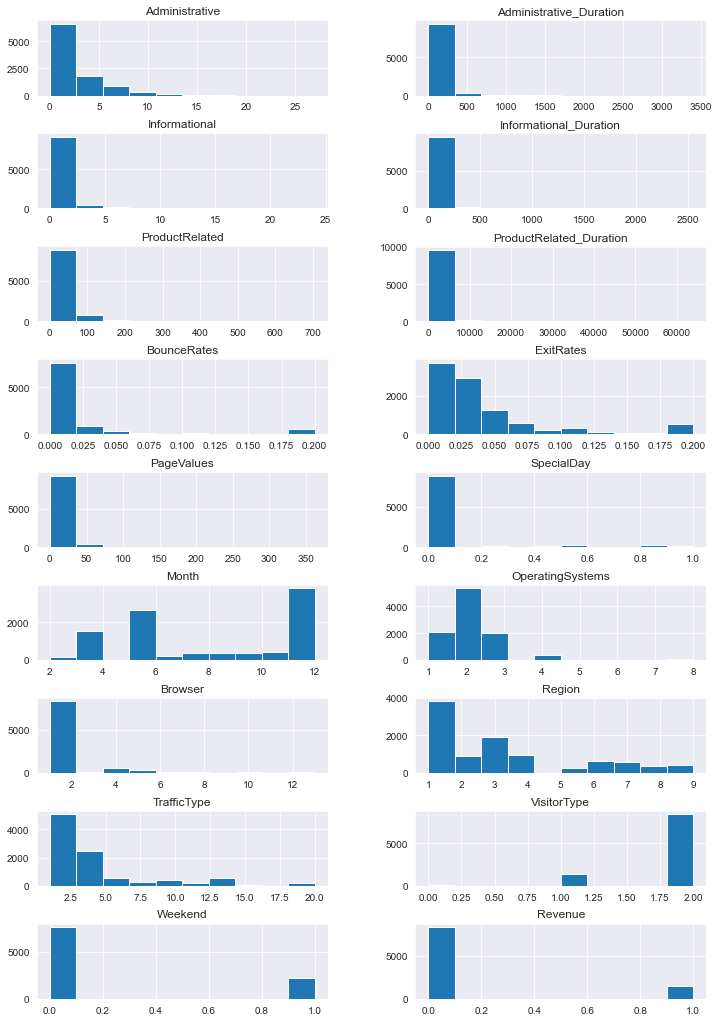

In [21]:
from matplotlib import pyplot as plt

data_encoded.hist(figsize=(12,18), layout=(9, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

<h3>outliers (we decided not to take in concideration Month (Categorical) OperatingSystems (Categorical) Browser (Categorical) Region (Categorical) TrafficType (Categorical) VisitorType (Categorical) Weekend (Binary) Revenue (Binary) not to lose important information)

In [57]:
def outliers_repl(data):
    data1=data.copy()
    for col in [ 
        'Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	
        'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay']:
        q1, q3 = np.percentile(data1[col], [25, 75])
        IQR = q3 - q1
        l_bound = q1 - 3 * IQR
        u_bound = q3 + 3 * IQR
        m1 = (data1[col] < l_bound)
        if m1.any():
            print(f"Outliers removed from {col}: Lower Bound = {l_bound}")
            data1.loc[m1, col] = l_bound
        m2 = (data1[col] > u_bound)
        if m2.any():
            print(f"Outliers removed from {col}: Upper Bound = {u_bound}")
            data1.loc[m2, col] = u_bound
    return data1

In [58]:
data_encoded_without_outliers=outliers_repl(data_encoded)

Outliers removed from Administrative: Upper Bound = 16.0
Outliers removed from Administrative_Duration: Upper Bound = 368.0
Outliers removed from Informational: Upper Bound = 0.0
Outliers removed from Informational_Duration: Upper Bound = 0.0
Outliers removed from ProductRelated: Upper Bound = 127.0
Outliers removed from ProductRelated_Duration: Upper Bound = 5326.758334
Outliers removed from BounceRates: Upper Bound = 0.066666668
Outliers removed from ExitRates: Upper Bound = 0.157142858
Outliers removed from PageValues: Upper Bound = 0.0
Outliers removed from SpecialDay: Upper Bound = 0.0


<h3> There are 2 scenarios: remove columns with an upper bound of 0 because they do not carry important information and cause noise, or leave these columns without changes.

In [60]:
def outliers_repl(data):
    data1 = data.copy()
    for col in ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	
        'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay']:
        q1, q3 = np.percentile(data1[col], [25, 75])
        IQR = q3 - q1
        l_bound = q1 - 3 * IQR
        u_bound = q3 + 3 * IQR

        if u_bound == 0:
            print(f"Skipping outlier removal for {col} as the upper bound is zero.")
            continue

        m1 = (data1[col] < l_bound)
        if m1.any():
            print(f"Outliers removed from {col}: Lower Bound = {l_bound}")
            data1.loc[m1, col] = l_bound

        m2 = (data1[col] > u_bound)
        if m2.any():
            print(f"Outliers removed from {col}: Upper Bound = {u_bound}")
            data1.loc[m2, col] = u_bound

    return data1
data_encoded_without_outliers=outliers_repl(data_encoded)

Outliers removed from Administrative: Upper Bound = 16.0
Outliers removed from Administrative_Duration: Upper Bound = 368.0
Skipping outlier removal for Informational as the upper bound is zero.
Skipping outlier removal for Informational_Duration as the upper bound is zero.
Outliers removed from ProductRelated: Upper Bound = 127.0
Outliers removed from ProductRelated_Duration: Upper Bound = 5326.758334
Outliers removed from BounceRates: Upper Bound = 0.066666668
Outliers removed from ExitRates: Upper Bound = 0.157142858
Skipping outlier removal for PageValues as the upper bound is zero.
Skipping outlier removal for SpecialDay as the upper bound is zero.


<h3> adding scaling final pipeline for preprocessing is:

In [2]:
#1st approach
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3.0):
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for i in range(X.shape[1]):
            col = X[:, i]
            q1, q3 = np.percentile(col, [25, 75])
            IQR = q3 - q1
            l_bound = q1 - self.factor * IQR
            u_bound = q3 + self.factor * IQR

            if u_bound == 0:
                continue

            col[col < l_bound] = l_bound
            col[col > u_bound] = u_bound

        return X

def preprocess_data(data):
    data_encoded = data.copy()
    month_to_num = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    visitor_to_num = {
        'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0
    }

    data_encoded['Month'] = data_encoded['Month'].map(month_to_num)
    data_encoded['VisitorType'] = data_encoded['VisitorType'].map(visitor_to_num)

    label_encoder = LabelEncoder()
    data_encoded['Weekend'] = label_encoder.fit_transform(data_encoded['Weekend'])
    data_encoded['Revenue'] = label_encoder.fit_transform(data_encoded['Revenue'])

    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), data_encoded.columns),
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('outlier_replacer', OutlierReplacer(factor=3.0)),
    ])

    data_encoded = pipeline.fit_transform(data_encoded)

    return data_encoded
data = pd.read_csv('data/data.csv')
processed_data = preprocess_data(data)
processed_df = pd.DataFrame(processed_data, columns=data.columns)
processed_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.698469,-0.456937,-0.397412,-0.245168,-0.555129,-0.573313,-0.155336,0.403282,-0.315593,-0.308364,-1.379116,-0.133009,-0.208651,-0.893147,-0.762078,0.400526,-0.543294,-0.422986
1,-0.091848,-0.378064,-0.397412,-0.245168,1.105528,0.127204,-0.404284,-0.599555,-0.315593,-0.308364,0.981493,-0.133009,-0.208651,-0.064048,-0.514160,0.400526,-0.543294,-0.422986
2,-0.698469,-0.456937,-0.397412,-0.245168,-0.689777,-0.622722,0.948207,2.394208,-0.315593,-0.308364,-1.379116,-0.133009,-0.208651,-0.893147,-0.762078,0.400526,-0.543294,-0.422986
3,0.818084,-0.179757,-0.397412,-0.245168,-0.600011,-0.583923,-0.456303,-0.510734,-0.315593,-0.308364,0.391341,-0.133009,-0.208651,2.008698,-0.514160,0.400526,-0.543294,-0.422986
4,-0.698469,-0.456937,-0.397412,-0.245168,-0.510246,-0.477616,0.386403,-0.019790,-0.315593,-0.308364,0.981493,0.965819,-0.208651,1.594149,0.973352,0.400526,-0.543294,-0.422986


In [33]:
#2nd approach
data = pd.read_csv('data/data.csv')

def map_categorical_features(data):
    data_encoded= data.copy()
    month_to_num = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    visitor_to_num = {
        'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0
    }

    data_encoded['Month'] = data_encoded['Month'].map(month_to_num)
    data_encoded['VisitorType'] = data_encoded['VisitorType'].map(visitor_to_num)

    label_encoder = LabelEncoder()
    data_encoded['Weekend'] = label_encoder.fit_transform(data_encoded['Weekend'])
    data_encoded['Revenue'] = label_encoder.fit_transform(data_encoded['Revenue'])

    return data_encoded

columns_to_keep = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates',
                   'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_keep),
    ],
    remainder='drop'
)

pipeline = Pipeline([
        ('mapper', FunctionTransformer(map_categorical_features)),
        ('preprocessor', preprocessor),
        ('outlier_replacer', OutlierReplacer(factor=3.0))
    ])

pipeline.fit(data) 
processed_data = pipeline.transform(data)  
columns = columns_to_keep
processed_df = pd.DataFrame(processed_data, columns=columns)  
processed_df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,ExitRates,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.698469,-0.456937,-0.555129,-0.573313,0.403282,-1.379116,-0.133009,-0.208651,-0.893147,-0.762078,0.400526,-0.543294,-0.422986
1,-0.091848,-0.378064,1.105528,0.127204,-0.599555,0.981493,-0.133009,-0.208651,-0.064048,-0.514160,0.400526,-0.543294,-0.422986
2,-0.698469,-0.456937,-0.689777,-0.622722,2.394208,-1.379116,-0.133009,-0.208651,-0.893147,-0.762078,0.400526,-0.543294,-0.422986
3,0.818084,-0.179757,-0.600011,-0.583923,-0.510734,0.391341,-0.133009,-0.208651,2.008698,-0.514160,0.400526,-0.543294,-0.422986
4,-0.698469,-0.456937,-0.510246,-0.477616,-0.019790,0.981493,0.965819,-0.208651,1.594149,0.973352,0.400526,-0.543294,-0.422986


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

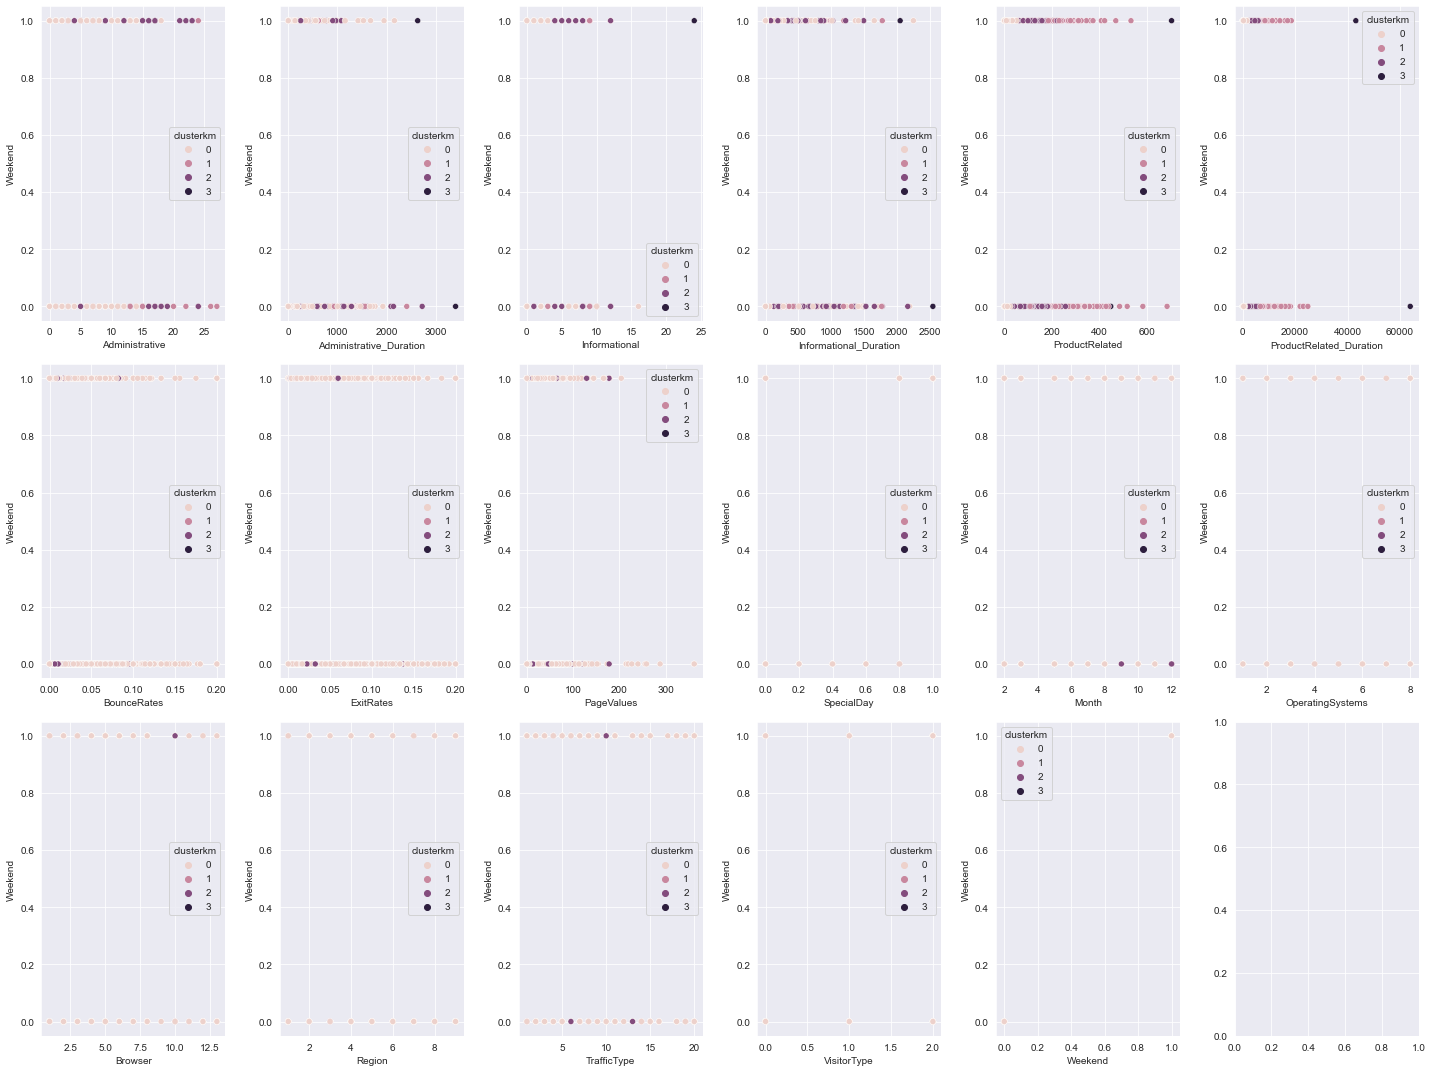

In [54]:
fig, axs = plt.subplots(3,6, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(data_encoded.columns[0:17]):
    
    sns.scatterplot(data=data_encoded,x=col,y="Weekend",hue="clusterkm",ax=axs[i])
plt.tight_layout()

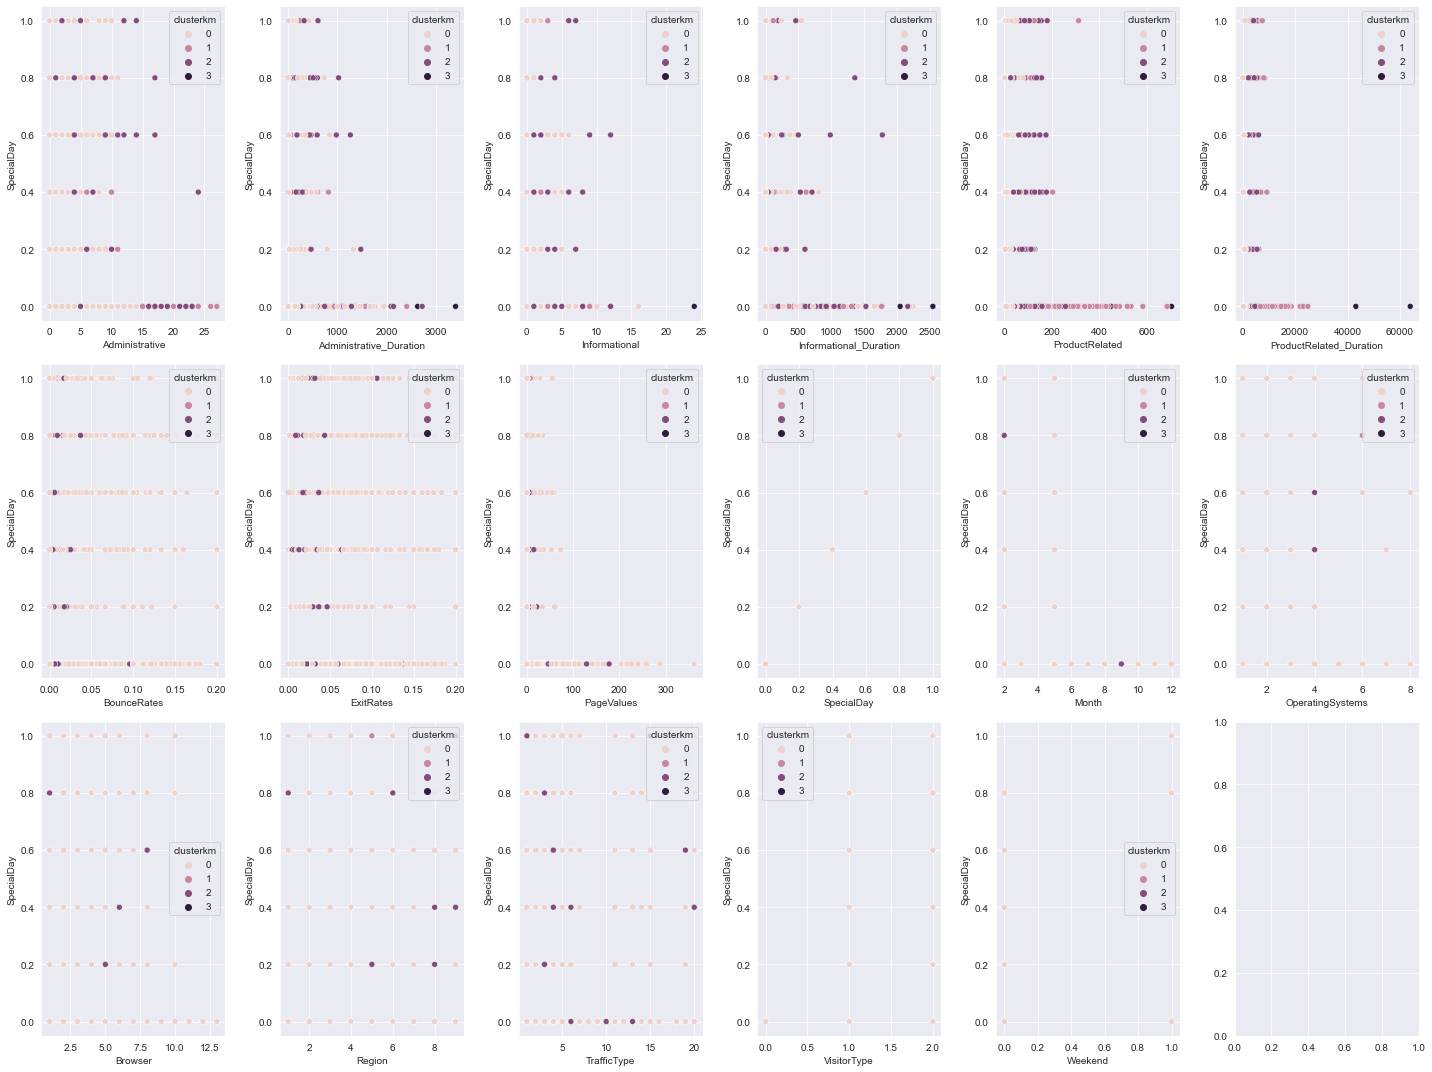

In [55]:
fig, axs = plt.subplots(3,6, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(data_encoded.columns[0:17]):

    sns.scatterplot(data=data_encoded,x=col,y="SpecialDay",hue="clusterkm",ax=axs[i])
plt.tight_layout()